In [19]:
### Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [39]:
# Import, read, and split data
data = pd.read_csv('data.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

In [40]:
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

In [41]:
X, y = randomize(X, y)

In [42]:
def draw_learning_curves(X, y, estimator, num_trainings):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

### Logistic Regression

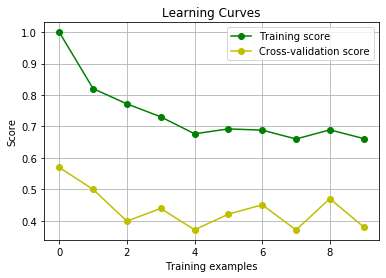

In [43]:
# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.
estimator = LogisticRegression()
draw_learning_curves(X, y, estimator, 10)

### Decision Tree

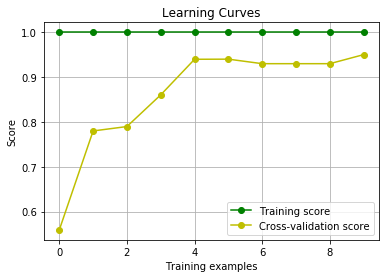

In [44]:
estimator = GradientBoostingClassifier()
draw_learning_curves(X, y, estimator, 10)

### Support Vector Machine

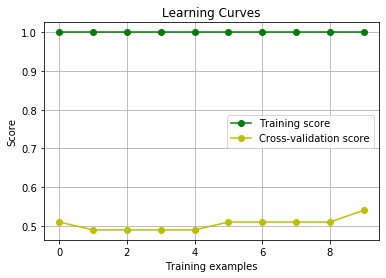

In [45]:
estimator = SVC(kernel='rbf', gamma=1000)
draw_learning_curves(X, y, estimator, 10)

### 对比结论
我们可以根据这些曲线得出结论：

- **对数几率回归**模型的训练和测试得分很低。
- **决策树**模型的训练和测试得分很高。
- **支持向量机**模型的训练得分很高，测试得分很低。

由此可以判断，逻辑回归模型欠拟合，支持向量机模型过拟合，决策树正常。